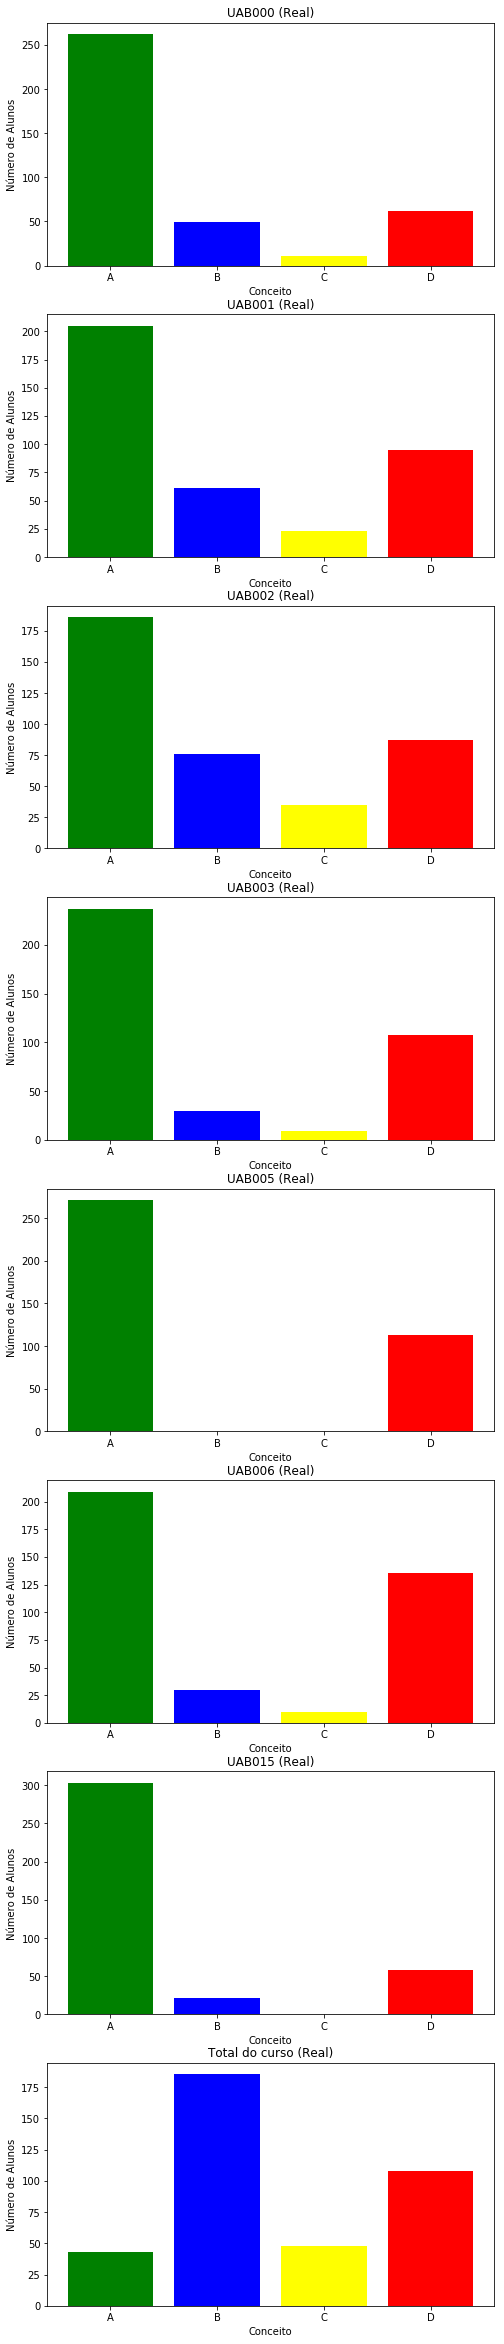

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline


plt.figure(10, figsize=(8, 42))
posicao = 811



df = pd.read_excel('DisciplinaGeral.xlsx')
#df = pd.read_csv("DG.csv", sep=";",encoding = "ISO-8859-1")
disciplinas = ['UAB000 (Real)','UAB001 (Real)','UAB002 (Real)','UAB003 (Real)','UAB005 (Real)','UAB006 (Real)','UAB015 (Real)','Total do curso (Real)']


for cadeira in disciplinas:
    df[cadeira] = df [cadeira].astype(str)
    df[cadeira] = [x.replace(',', '.') for x in df[cadeira]]
    df[cadeira] = [x.replace('-', '0') for x in df[cadeira]]
    df[cadeira] = df[cadeira].astype(float)
    

    A,B,C,D = [],[],[],[]
    for nota in df[cadeira]:
        if nota >= 9.0:
            A.append(nota)
        elif nota >= 7.5:
            B.append(nota)
        elif nota >= 6.0:
            C.append(nota)
        else:
            D.append(nota)
        
    with PdfPages('multipage_pdf.pdf') as pdf:
        plt.subplot(posicao)
        plt.title(cadeira)
        plt.xlabel('Conceito')
        plt.ylabel('Número de Alunos')
        plt.bar(["A","B","C","D"],[len(A),len(B),len(C),len(D)],color=['green', 'blue','yellow','red'])
        posicao += 1
        pdf.savefig()
    
    

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn import tree
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from scipy.stats.stats import pearsonr

def cordosconceitos(cores,notas):
    
    for conceito in range(len(notas)):
        if notas[conceito]==0:
            cores.append('green')
        elif notas[conceito]==1:
            cores.append('blue')
        elif notas[conceito]==2:
            cores.append('yellow')
        elif notas[conceito]==3:
            cores.append('red')


cadeira1='UAB000 (Real)'
cadeira2='UAB015 (Real)'
totaldocurso= 'Total do curso (Real)'

df3 = df[[cadeira1,cadeira2,totaldocurso]] #A=0,B=1,C=2,D=3
aluno = 0

for nota in df3[totaldocurso]:
    if nota >= 9.0:
        df3.at[aluno, totaldocurso] = 0     #.at interage com um valor do dataframe
    elif nota >= 7.5:
        df3.at[aluno, totaldocurso] = 1
    elif nota >= 6.0:
        df3.at[aluno, totaldocurso] = 2
    else:
        df3.at[aluno, totaldocurso] = 3
    aluno+=1
 

'''df3=df3.ix[df3['UAB000 (Real)'] !=0]    #Retirando-se valores nulos acarretou na diminuição da precisao e do Pearson
df3=df3.ix[df3['UAB015 (Real)'] !=0]'''




X = df3[[cadeira1,cadeira2]].values   #values transforma o dataframe em um array do numpy
y = df3[totaldocurso].values



precisao= 0;

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1)
    clf = svm.SVC().fit(X_train,y_train)
    predictions = clf.predict(X_test)
    precisao += accuracy_score(y_test,predictions)

print("Precisao de : ", round(precisao/(i+1),2),"%")

pearson = pearsonr(X[:, 0], X[:, 1])
print("Coefiente de Pearson : ", round(pearson[0],2))

print("Média Cadeira 1:",round(df3[cadeira1].mean(),2),"Média Cadeira 2:",round(df3[cadeira2].mean(),2))

cores = []
cores2 = []
cores3 = []


cordosconceitos(cores,predictions)
cordosconceitos(cores2,y_test)
cordosconceitos(cores3,y)

        

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(X_test[:, 0], X_test[:, 1],c= cores2)
plt.title("Nota Final Real")
plt.xlabel(cadeira1)
plt.ylabel(cadeira2)


plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1],c= cores)
plt.title("Nota Final Previsão")
plt.xlabel(cadeira1)
plt.ylabel(cadeira2)

plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1],c= cores3)
plt.title("Amostra")
plt.xlabel(cadeira1)
plt.ylabel(cadeira2)




/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'df' is not defined

## Considerações
Cada módulo possui 2 ou 3 cadeiras com suas respectivas notas e a nota do questionário. A nota total da categoria (nota do módulo) é calculada por uma media ponderada das notas do módulo da forma: 

>Nota total = 30% Cadeira 1 + 30% Cadeira 2 + 40% Questionário

ou

>Nota total = 20% Cadeira 1 + 20% Cadeira 2 + 20% Cadeira 3 + 40% Questionário

Dependendo do número de cadeiras do módulo. As provas substitutivas de cada módulo já se encontram alteradas na coluna da prova padrão.RECUPERAÇÃO(???). O total do curso é calculado usando uma média entre as notas totais de cada módulo.